# Individual Project 4
---
**Author**: Clayton Catanzarite  
**Version**: 1.0  
**Semester**: Spring 2021  
**Summary**:  

This is the fourth project for the DS-160-01 class. In this project, we are finding a dataset of ours and using the tools that we used in the past to clean and analyze the data. 

# Import Packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Beginning the exploration

In [109]:
df = pd.read_csv('CFBattendance.csv',encoding='cp1252')
df.head()

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,CurrentWins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 380,53946,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38-31,54286,1,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 28-21,51482,1,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No.25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 7-38,51162,1,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,Louisiana–Monroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 52-6,50947,3,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7


In [110]:
df.rename(columns={"PRCP": "precipitation",
                   "SNWD":"snow_depth_in",
                   "TMAX":"temp_max_f",
                   "TMIN":"temp_min_f",
                   "SNOW": "snow_in"},inplace=True)
df.columns

Index(['Date', 'Team', 'Time', 'Opponent', 'Rank', 'Site', 'TV', 'Result',
       'Attendance', 'CurrentWins', 'Current Losses', 'Stadium Capacity',
       'Fill Rate', 'New Coach', 'Tailgating', 'precipitation', 'snow_in',
       'snow_depth_in', 'temp_max_f', 'temp_min_f', 'Opponent_Rank',
       'Conference', 'Year', 'Month', 'Day'],
      dtype='object')

In [111]:
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               object
Attendance            int64
CurrentWins           int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
precipitation       float64
snow_in             float64
snow_depth_in       float64
temp_max_f            int64
temp_min_f            int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
dtype: object

### Summary statistics for continous variables

In [112]:
df['Attendance'].describe()

count      6672.000000
mean      45311.522782
std       25185.690583
min        2267.000000
25%       23301.000000
50%       42527.500000
75%       62358.000000
max      110889.000000
Name: Attendance, dtype: float64

In [113]:
df['CurrentWins'].describe()

count    6672.000000
mean        2.872152
std         2.427666
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: CurrentWins, dtype: float64

In [114]:
df['Current Losses'].describe()

count    6672.000000
mean        2.348471
std         2.237201
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: Current Losses, dtype: float64

In [115]:
df['Stadium Capacity'].describe()

count      6672.000000
mean      54567.472872
std       21755.536191
min       17000.000000
25%       36000.000000
50%       52180.000000
75%       71799.000000
max      107282.000000
Name: Stadium Capacity, dtype: float64

In [116]:
df['Fill Rate'].describe()

count    6672.000000
mean        0.793865
std         0.221910
min         0.067483
25%         0.645396
50%         0.848149
75%         0.990060
max         1.403993
Name: Fill Rate, dtype: float64

In [117]:
df['precipitation'].describe()

count    6672.000000
mean        0.093230
std         0.337667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         6.450000
Name: precipitation, dtype: float64

In [118]:
df['snow_in'].describe()

count    6672.000000
mean        0.009607
std         0.192520
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.200000
Name: snow_in, dtype: float64

In [119]:
df['snow_depth_in'].describe()

count    6672.000000
mean        0.015812
std         0.255716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.100000
Name: snow_depth_in, dtype: float64

In [120]:
df['temp_max_f'].describe()

count    6672.000000
mean       71.923711
std        14.457450
min        19.000000
25%        62.000000
50%        73.000000
75%        83.000000
max       111.000000
Name: temp_max_f, dtype: float64

In [121]:
df['temp_min_f'].describe()

count    6672.000000
mean       50.144185
std        14.175122
min         0.000000
25%        40.000000
50%        51.000000
75%        61.000000
max       103.000000
Name: temp_min_f, dtype: float64

### Summary Statistics for discrete variables

In [122]:
df['Team'].groupby(df['Team']).count().sort_values()

Team
Western Kentucky     52
Georgia State        52
South Alabama        62
Troy                 62
Ohio                 71
                   ... 
Michigan State      129
Arkansas            129
Penn State          130
Nebraska            130
Hawaii              132
Name: Team, Length: 63, dtype: int64

In [123]:
df['Opponent'].groupby(df['Opponent']).count().sort_values()

Opponent
(FCS) The Citadel*          1
No.21 Missouri*             1
No.21 Northern Illinois     1
No.21 Ohio State*           1
No.21 Oklahoma State*       1
                           ..
Purdue                     45
Colorado                   46
Akron                      46
Kansas                     47
Iowa State                 48
Name: Opponent, Length: 1365, dtype: int64

In [124]:
df['Rank'].groupby(df['Rank']).count().sort_values()

Rank
13      41
6       45
3       50
15      52
5       53
7       54
12      54
9       54
2       55
8       55
14      56
4       56
10      58
16      59
20      59
21      61
22      61
23      61
25      62
18      62
11      63
17      65
1       73
19      73
24      77
NR    5213
Name: Rank, dtype: int64

In [125]:
df['Site'].groupby(df['Site']).count().sort_values()

Site
Huskie StadiumDeKalb, IL (Battle for the Bronze Stalk)      1
Spectrum StadiumOrlando, FL (College GameDay)               1
Glass BowlToledo, Ohio (Battle of I-75)                     1
Reser StadiumCorvallis, OR (122nd Civil War)                1
Husky StadiumSeattle, WA  - (Apple Cup)                     1
                                                         ... 
Jack Trice StadiumAmes, IA                                100
Beaver StadiumUniversity Park, PA                         102
Camp Randall StadiumMadison, WI                           103
Rose BowlPasadena, CA                                     105
Aloha StadiumHonolulu, HI                                 114
Name: Site, Length: 449, dtype: int64

In [126]:
df['TV'].groupby(df['TV']).count().sort_values()

TV
4SD              1
HTS              1
Jayhawk SN       1
KASY             1
KATV             1
              ... 
FSN            403
ABC            453
ESPN2          460
ESPN           508
Not on TV     1317
Name: TV, Length: 245, dtype: int64

In [127]:
df['New Coach'].groupby(df['New Coach']).count().sort_values()

New Coach
True     1093
False    5579
Name: New Coach, dtype: int64

In [128]:
df['Tailgating'].groupby(df['Tailgating']).count().sort_values()

Tailgating
True     1431
False    5241
Name: Tailgating, dtype: int64

In [129]:
df['Opponent_Rank'].groupby(df['Opponent_Rank']).count().sort_values()

Opponent_Rank
5       37
6       38
11      38
12      39
8       40
24      40
18      40
17      43
23      44
7       44
20      44
14      44
16      45
9       46
25      46
22      47
19      47
3       48
4       48
15      49
13      51
10      52
21      57
2       68
1       79
NR    5498
Name: Opponent_Rank, dtype: int64

In [130]:
df['Conference'].groupby(df['Conference']).count().sort_values()

Conference
Big East         81
FCS              91
Independent     193
AAC             273
Sun Belt        392
WAC             396
MWC             414
SEC             434
Pac-12          508
CUSA            537
Mid-American    711
Big-10          782
Big-12          903
ACC             957
Name: Conference, dtype: int64

In [131]:
df['Year'].groupby(df['Year']).count().sort_values()

Year
2000    292
2001    297
2004    309
2005    317
2003    351
2002    352
2017    354
2018    355
2006    359
2013    363
2014    363
2012    366
2015    366
2007    366
2010    370
2016    370
2009    371
2011    373
2008    378
Name: Year, dtype: int64

In [132]:
df['Month'].groupby(df['Month']).count().sort_values()

Month
1        1
4        4
12     110
8      220
11    1941
10    2080
9     2316
Name: Month, dtype: int64

In [133]:
df['Day'].groupby(df['Day']).count().sort_values()

Day
31    130
28    169
26    169
25    180
14    181
21    188
9     188
16    188
18    196
12    198
19    198
23    201
7     204
27    205
5     212
4     214
11    218
2     220
13    221
24    232
17    234
20    238
29    239
15    242
10    246
22    246
8     251
3     251
30    253
6     273
1     287
Name: Day, dtype: int64

### Correlation matrix for all continous variables

In [134]:
dfcopy=df
dfcopy.drop(['Year','Month','Day','New Coach'],axis=1,inplace=True)
dfcopy.corr()

,Attendance,CurrentWins,Current Losses,Stadium Capacity,Fill Rate,Tailgating,precipitation,snow_in,snow_depth_in,temp_max_f,temp_min_f
Attendance,1.000000,0.193411,-0.318375,0.899150,0.736451,0.739330,-0.019183,-0.010320,-0.011297,0.046539,0.054595
CurrentWins,0.193411,1.000000,0.113141,0.134485,0.171554,0.141993,-0.022694,0.033066,0.063576,-0.490596,-0.486005
Current Losses,-0.318375,0.113141,1.000000,-0.209049,-0.399002,-0.201371,-0.038956,0.070013,0.060223,-0.451237,-0.439433
Stadium Capacity,0.899150,0.134485,-0.209049,1.000000,0.412737,0.681427,-0.024220,-0.017017,-0.015403,0.068018,0.108162
Fill Rate,0.736451,0.171554,-0.399002,0.412737,1.000000,0.430187,-0.022863,0.000019,-0.008200,0.047763,0.006804
Tailgating,0.739330,0.141993,-0.201371,0.681427,0.430187,1.000000,-0.007432,-0.009955,-0.007608,-0.016288,0.020884
precipitation,-0.019183,-0.022694,-0.038956,-0.024220,-0.022863,-0.007432,1.000000,0.040167,0.013654,-0.022923,0.111581
snow_in,-0.010320,0.033066,0.070013,-0.017017,0.000019,-0.009955,0.040167,1.000000,0.508124,-0.124852,-0.097667
snow_depth_in,-0.011297,0.063576,0.060223,-0.015403,-0.008200,-0.007608,0.013654,0.508124,1.000000,-0.154523,-0.130962
temp_max_f,0.046539,-0.490596,-0.451237,0.068018,0.047763,-0.016288,-0.022923,-0.124852,-0.154523,1.000000,0.828600


<AxesSubplot:>

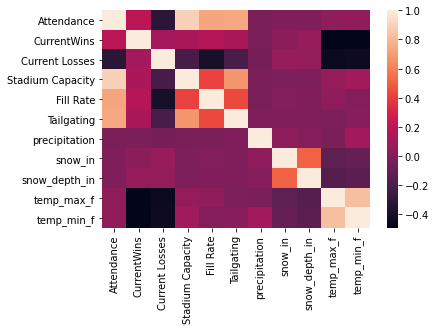

In [135]:
sns.heatmap(dfcopy.corr())

## Data set graphical exploration

### Distributions

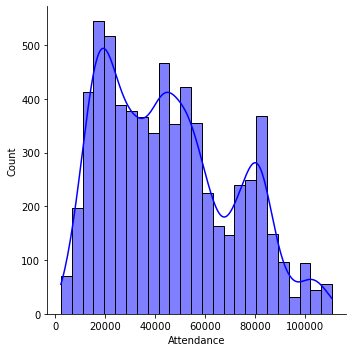

In [143]:
sns.displot(df.Attendance,color='blue', bins=25,kde=True)

In [145]:
SECdf = df.query("Conference == 'SEC'")
B10df = df.query("Conference == 'Big-10'")
PACdf = df.query("Conference == 'Pac-12'")
B12df = df.query("Conference == 'Big-12'")
ACCdf = df.query("Conference == 'ACC'")

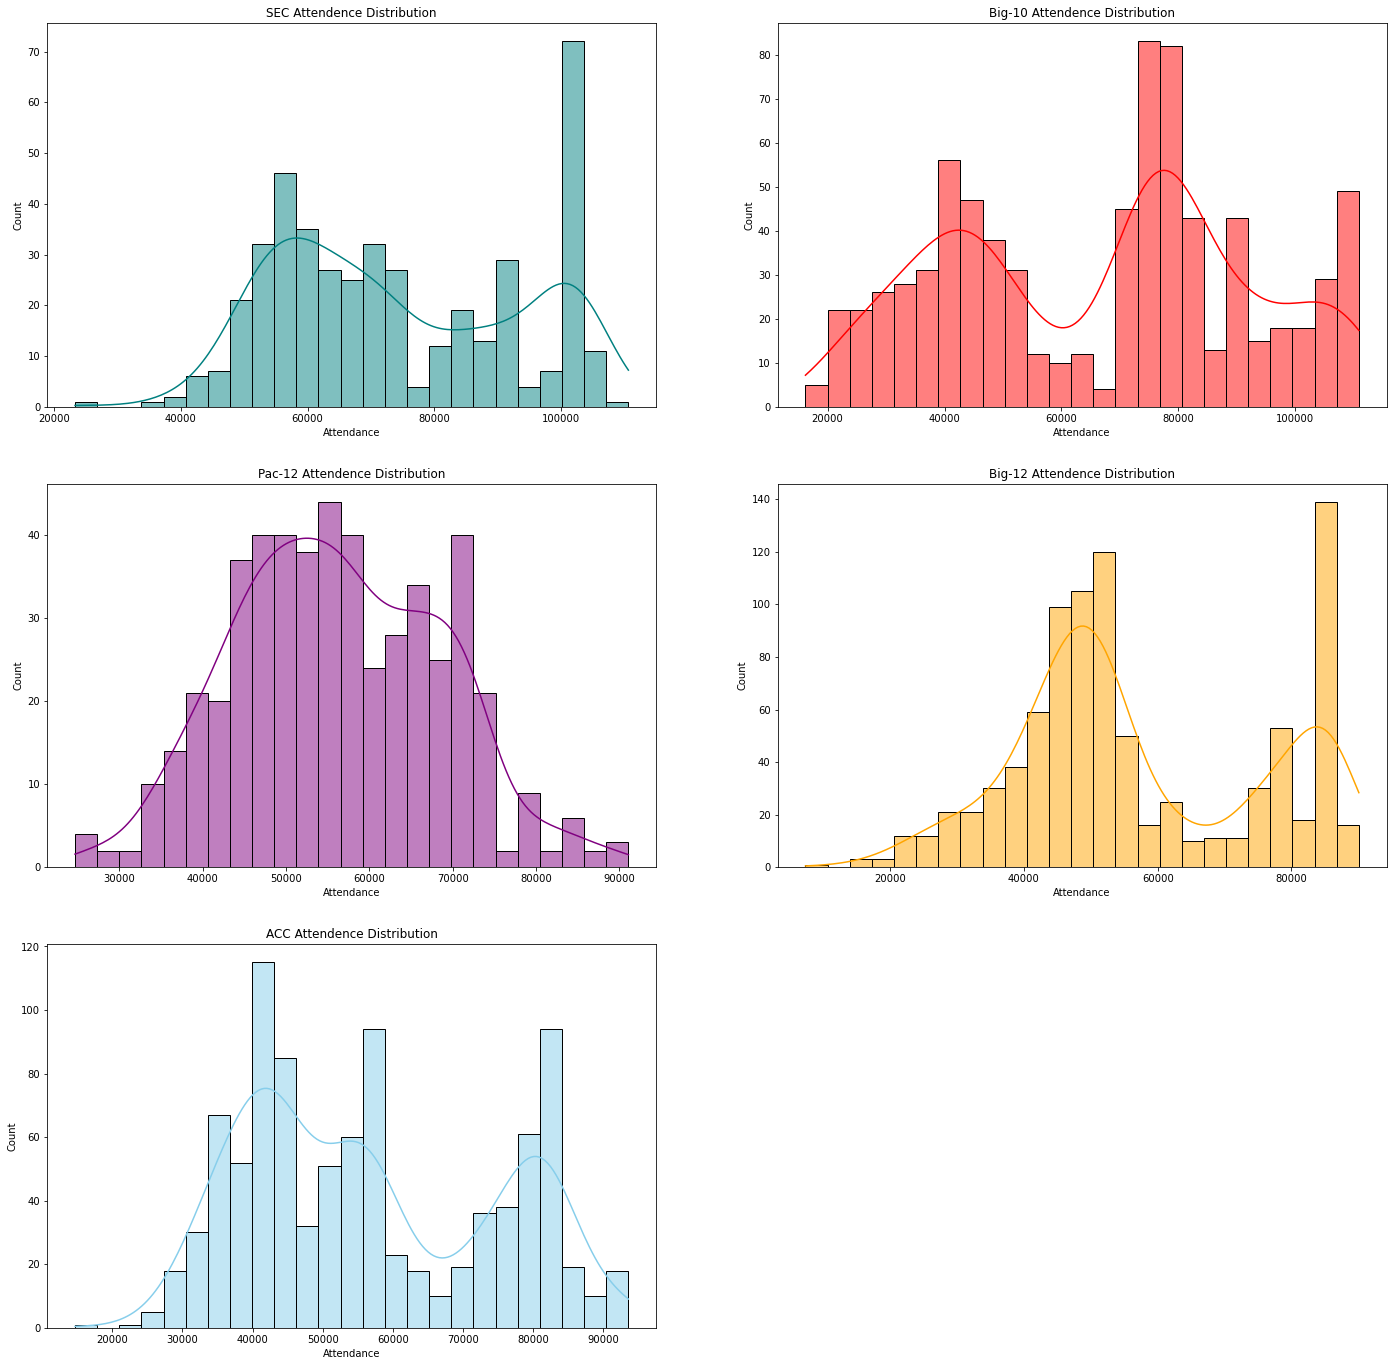

In [172]:
fig = plt.figure(figsize=(24, 24))
ax1 = fig.add_subplot(321,title="SEC Attendence Distribution")
sns.histplot(SECdf.Attendance,color='teal',bins=25,kde=True,ax=ax1)

ax2 = fig.add_subplot(322,title="Big-10 Attendence Distribution")
sns.histplot(B10df.Attendance,color='red',bins=25,kde=True,ax=ax2)

ax3 = fig.add_subplot(323,title="Pac-12 Attendence Distribution")
sns.histplot(PACdf.Attendance,color='purple',bins=25,kde=True,ax=ax3)

ax4 = fig.add_subplot(324,title="Big-12 Attendence Distribution")
sns.histplot(B12df.Attendance,color='orange',bins=25,kde=True,ax=ax4)

ax5 = fig.add_subplot(325,title="ACC Attendence Distribution")
sns.histplot(ACCdf.Attendance,color='skyblue',bins=25,kde=True,ax=ax5)

fig.savefig('power5attendence.png')

### Scatter plots

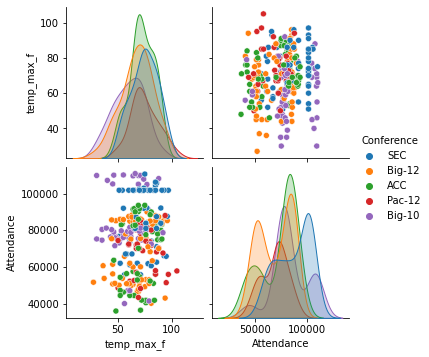

In [198]:
Power5df = df.query("Conference == 'Big-10' or Conference == 'SEC' or Conference == 'Big-12' or Conference == 'ACC' or Conference == 'Pac-12'")
Rankeddf =Power5df.query("Rank != 'NR' and Opponent_Rank != 'NR'")
sns.pairplot(Rankeddf[['temp_max_f', 'Attendance','Conference']],hue='Conference')